In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:



comb_1=pd.read_csv("comb_flux_1.csv")
comb_2=pd.read_csv("comb_flux_2.csv")
comb_3=pd.read_csv("comb_flux_3.csv")
comb_4=pd.read_csv("comb_flux_4.csv")

comb_1=comb_1[['Unnamed: 0','Enzyme_G']]
comb_2=comb_2[['Unnamed: 0','Enzyme_G']]
comb_3=comb_3[['Unnamed: 0','Enzyme_G']]
comb_4=comb_4[['Unnamed: 0','Enzyme_G']]

comb_1=comb_1.rename(columns={"Unnamed: 0":"Cart"})
comb_2=comb_2.rename(columns={"Unnamed: 0":"Cart"})
comb_3=comb_3.rename(columns={"Unnamed: 0":"Cart"})
comb_4=comb_4.rename(columns={"Unnamed: 0":"Cart"})

In [6]:
comb_3

,Cart,Enzyme_G
0,"(1.5, 1.0, 1.5, 1.0, 2.0, 1.0, 2.0)",0.748938
1,"(1.5, 1.0, 1.5, 1.0, 2.0, 1.0, 4.0)",0.374469
2,"(1.5, 1.0, 1.5, 1.0, 2.0, 1.5, 0.25)",5.991502
3,"(1.5, 1.0, 1.5, 1.0, 2.0, 1.5, 0.5)",2.995754
4,"(1.5, 1.0, 1.5, 1.0, 2.0, 1.5, 1.0)",1.497877
...,...,...
79995,"(4.0, 0.25, 4.0, 0.5, 0.25, 1.5, 0.5)",1.468851
79996,"(4.0, 0.25, 4.0, 0.5, 0.25, 1.5, 1.0)",0.740540
79997,"(4.0, 0.25, 4.0, 0.5, 0.25, 1.5, 1.5)",0.494787
79998,"(4.0, 0.25, 4.0, 0.5, 0.25, 1.5, 2.0)",0.371468


In [7]:
enz_names=['vmax_forward_Enzyme_A','vmax_forward_Enzyme_B',"vmax_forward_Enzyme_C",
       "vmax_forward_Enzyme_D","vmax_forward_Enzyme_E","vmax_forward_Enzyme_F","vmax_forward_Enzyme_G"]

Cart1=comb_1['Cart']
Cart2=comb_2['Cart']
Cart3=comb_3['Cart']
Cart4=comb_4['Cart']


Flux1=comb_1['Enzyme_G']
Flux2=comb_2['Enzyme_G']
Flux3=comb_3['Enzyme_G']
Flux4=comb_4['Enzyme_G']



comb_designs=[]
for k,i in enumerate(Cart1):
    i=i.replace('(',"")
    i=i.replace(')',"")
    i=i.split(",")
    i=tuple([float(x) for x in i])
    temp=dict(zip(enz_names,tuple(i)))

    temp['Enzyme_G']=Flux1[k]

    comb_designs.append(temp)


for k,i in enumerate(Cart2):
    i=i.replace('(',"")
    i=i.replace(')',"")
    i=i.split(",")
    i=tuple([float(x) for x in i])
    temp=dict(zip(enz_names,tuple(i)))

    temp['Enzyme_G']=Flux2[k]

    comb_designs.append(temp)
             


for k,i in enumerate(Cart3):
    i=i.replace('(',"")
    i=i.replace(')',"")
    i=i.split(",")
    i=tuple([float(x) for x in i])
    temp=dict(zip(enz_names,tuple(i)))
    temp['Enzyme_G']=Flux3[k]
    comb_designs.append(temp)
    
    
for k,i in enumerate(Cart4):
    i=i.replace('(',"")
    i=i.replace(')',"")
    i=i.split(",")
    i=tuple([float(x) for x in i])
    temp=dict(zip(enz_names,tuple(i)))
    temp['Enzyme_G']=Flux4[k]
    comb_designs.append(temp)
    #comb_designs['Enzyme_G']=Flux4[i]
    

In [8]:
len(comb_designs)


279936

In [9]:
simulated_space=pd.DataFrame(comb_designs)

In [13]:
simulated_space.to_csv("combinatorial_space_pathway_A.csv",index=False)

In [22]:
np.argsort(simulated_space['Enzyme_G'])[::-1][0:100]



279935    279930
279934    272154
279933    264378
279932    279714
279931    271938
           ...  
279840    263718
279839    254868
279838    279054
279837    271278
279836    263502
Name: Enzyme_G, Length: 100, dtype: int64

vmax_forward_Enzyme_A    4.000000
vmax_forward_Enzyme_B    4.000000
vmax_forward_Enzyme_C    4.000000
vmax_forward_Enzyme_D    4.000000
vmax_forward_Enzyme_E    4.000000
vmax_forward_Enzyme_F    4.000000
vmax_forward_Enzyme_G    0.500000
Enzyme_G                 7.946944
Name: 279931, dtype: float64

# Combinatorial space plots

/home/plent/anaconda3/envs/skimpy-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


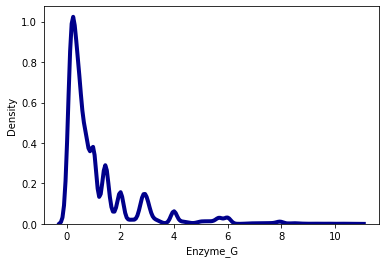

In [12]:
import seaborn as sns
# Density Plot and Histogram of all arrival delays
plot=sns.distplot(simulated_space['Enzyme_G'], hist=False, kde=True, 
             bins=int(2000/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



#plt.plot(base[:-1], len(simulated_space['Enzyme_G'])-cumulative, c='green')

In [133]:
len(simulated_space['Enzyme_G'])

119936

In [ ]:
# evaluate the histogram
values, base = np.histogram(simulated_space['Enzyme_G'], bins=10000)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative/len(simulated_space['Enzyme_G']), c='blue')
plt.axvline(1,c="black",linestyle="--",linewidth=1)


#plot the survival function